### 100k MovieLens Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import sparse
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp.
              The timestamps are unix seconds since 1/1/1970 UTC.

In [148]:
# import user-item ratings
udata = pd.read_csv('ml-100k/u.data', delimiter = "\t", header=None)
udata.columns = ["user_id", "item_id", "rating", "timestamp"]

udata.rating.min()

1

   user_id  item_id  rating  timestamp                date  day
0      196      242     0.0  881250949 1997-12-04 15:55:49   75
1      186      302     0.0  891717742 1998-04-04 19:22:22  196
2       22      377    -1.0  878887116 1997-11-07 07:18:36   48
3      244       51    -0.5  880606923 1997-11-27 05:02:03   68
4      166      346    -1.0  886397596 1998-02-02 05:33:16  135
Unique Days: 213


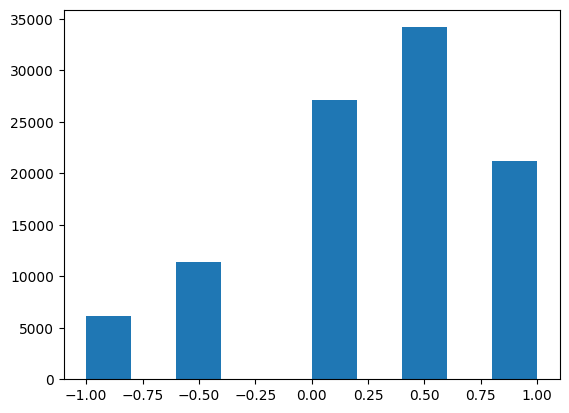

In [336]:
# import user-item ratings
udata = pd.read_csv('ml-100k/u.data', delimiter = "\t", header=None)
udata.columns = ["user_id", "item_id", "rating", "timestamp"]

# normalize ratings to [-1, 1] scale
scaler = MinMaxScaler(feature_range=(-1,1))
udata['rating'] = scaler.fit_transform(udata.rating.to_numpy().reshape(-1, 1))

# change timestamp to dates
min_date = datetime(1970, 1, 1)
udata['date'] = udata.timestamp.apply(lambda x: min_date + timedelta(seconds=x))
udata['day'] = udata['date'].apply(lambda x: (x - min_date).days)
udata.day = udata.day - udata.day.min()

# header
plt.hist(udata.rating)
print(udata.head())

# number of unique days
print('Unique Days:', udata.day.nunique())

In [469]:
# select top N most popular movies
N = 100
top_N_items = udata.item_id.value_counts().sort_values(ascending=False)[:N].index

# filter dataset to include only top N most popular items
udata[udata.item_id.isin(top_N_items)]

user_id      29931
item_id      29931
rating       29931
timestamp    29931
date         29931
day          29931
dtype: int64

In [121]:
# pivot rating data
ratings = udata.pivot(index="user_id", columns="item_id", values="rating")

ratings.index = ratings.index - 1
ratings.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# import imformation about the items (movies)
uitem = pd.read_csv('ml-100k/u.item', delimiter='|', encoding='Latin-1', header=None, engine="python")
uitem.columns = ["movie_id", "movie_title", "release_date ", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]

# select features
cols = ["movie_id", "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]

# header       
uitem = uitem[cols]    
uitem.head()

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [173]:
# import information about the users 
uuser = pd.read_csv('ml-100k/u.user', delimiter="|", header=None, engine="python")
uuser.columns = ["user_id", "age", "gender", "occupation", "zip_code"]

# one-hot encode data
uuser = pd.get_dummies(uuser)

uuser.head()

,user_id,age,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,zip_code_N2L5N,zip_code_N4T1A,zip_code_R3T5K,zip_code_T8H1N,zip_code_V0R2H,zip_code_V0R2M,zip_code_V1G4L,zip_code_V3N4P,zip_code_V5A2B,zip_code_Y1A6B
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,53,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calculating posterior mean and covariances of item feature vectors
I am trying to decide if I should keep the data stacked or if I should use a spare matrix representation.

In [184]:
# draw latent item vectors 
from audioop import mul
import numpy as np
from numpy.random import multivariate_normal
from numpy.linalg import inv
from numpy import argmax, matmul, identity, transpose

# set latent vector dimension, prior distrubtions on user, item and ratings
n = 10
sigma = 1
sigma_p = 1
sigma_q = 1
lambda_p = sigma/sigma_p
lambda_q = sigma/sigma_q
I = identity(n)

# generate latent item vector
size = len(ratings)
latent_items = multivariate_normal(n*[0], sigma_q*I, size=size)

pd.DataFrame(latent_items).head()

,0,1,2,3,4,5,6,7,8,9
0,-1.673943,-0.330171,-1.573370,1.049208,-0.294425,-1.005366,-1.244413,0.471754,0.684950,0.571647
1,0.076178,0.321109,-0.132929,-0.804711,-1.784555,1.711348,-0.162651,0.394250,-0.456264,-0.673010
2,-0.166611,-0.383983,-2.113605,1.290846,1.304115,-0.700098,1.861549,1.280188,1.462977,0.520472
3,-0.378955,1.072704,-0.092459,-0.770999,1.752047,-0.706439,-0.016667,1.461731,-1.326031,1.157778
4,-0.507980,0.235415,-0.182126,2.595542,-0.650948,-0.987448,-1.561321,0.859769,0.359793,0.555470


In [185]:
# compute item posterior mean and covariance
posterior_item_mean = []
posterior_item_cov = []
for j in range(ratings.shape[1]):
    # users who rated item j
    user_idx = ratings.iloc[:, j].dropna().index

    # items with user latent vectors as rows
    B = latent_items[user_idx, :]
    r = ratings.iloc[:, j].dropna().values

    # force shape to column vector
    r.shape = (r.shape[0], 1)

    # posterior mean for latent item vector, ratings affect the result
    v = matmul(matmul(inv(matmul(B.T, B) + lambda_q*I), B.T), r)
    posterior_item_mean.append(v)

    # posterior covariace for latent item vector, number of ratings reduce uncertainty
    Psi = inv(matmul(B.T, B) + lambda_q*I)*sigma
    posterior_item_cov.append(Psi)

# 10M MovieLens Dataset
We need this to repeat the format of study https://arxiv.org/pdf/1708.03058.pdf.

As in the paper, will pick the top N = 100 most popular movies for our experiment.

In [152]:
# read data into list of lists
file = 'datasets/MovieLens10M/ratings.dat'
datContent = [i.strip().split('::') for i in open(file).readlines()]

# read into csv
ratings = pd.read_csv(datContent, sep=',', engine='python', header=None)
ratings.columns = ['user_id', 'item_id', 'rating', 'timestamp']

# show header
ratings.head()

,user_id,item_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


19 buckets over the top N = 100 most popular movies gives us about 100k user visits per time bucket.

In [153]:
# select top N most popular movies
N = 100
top_N_items = ratings.item_id.value_counts().sort_values(ascending=False)[:N].index

# filter dataset to include only top N most popular items
ratings = ratings[ratings.item_id.isin(top_N_items)]

# normalize ratings to [-1, 1] scale
scaler = MinMaxScaler(feature_range=(-1, 1))
ratings['rating1'] = scaler.fit_transform(ratings.rating.to_numpy().reshape(-1, 1))

# ratings 2 scaled to have 1 for 4, 5 (0.6 - 1) and 0 otherwise
ratings['rating2'] = ratings['rating'].copy()
ratings.loc[ratings.rating >= 4, 'rating2'] = 1
ratings.loc[ratings.rating < 4, 'rating2'] = 0

# order by time
ratings = ratings.sort_values('timestamp', ascending=True)

# add time buckets
bins = 19
ratings['time_bucket'] = pd.cut(np.arange(len(ratings)), bins=bins, labels=np.arange(bins)).astype(int)

# encode item_id
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode user and item IDs
ratings['item_id'] = le.fit_transform(ratings.item_id.to_numpy())
ratings['user_id'] = le.fit_transform(ratings.user_id.to_numpy())

# save file
cols = ['user_id', 'item_id', 'rating1', 'rating2', 'time_bucket']
ratings[cols].to_csv('datasets/MovieLens10M_ratings.csv', index=False)

In [138]:
# ratings 2 scaled to have 1 for 4, 5 (0.6 - 1) and 0 otherwise
ratings['rating2'] = ratings['rating'].copy()
ratings.loc[ratings.rating >= 0.6, 'rating2'] = 1
ratings.loc[ratings.rating < 0.6, 'rating2'] = 0

# save
cols = ['user_id', 'item_id', 'rating', 'rating2', 'time_bucket']
ratings[cols].to_csv('datasets/MovieLens10M_ratings.csv', index=False)
ratings.head()

,user_id,item_id,rating,timestamp,time_bucket,rating2
5167081,35472,8,1.000000,789652009,0,1.0
5167075,35472,3,0.111111,789652009,0,0.0
4932029,33817,5,1.000000,822873600,0,1.0
4913854,33716,2,0.555556,822873600,0,0.0
4961483,34006,3,1.000000,822873600,0,1.0


In [154]:
ratings_ = pd.read_csv('datasets/MovieLens10M_ratings.csv')
ratings_.head()

,user_id,item_id,rating1,rating2,time_bucket
0,35472,8,1.000000,1.0,0
1,35472,3,0.111111,0.0,0
2,34006,2,0.111111,0.0,0
3,33716,9,1.000000,1.0,0
4,33716,8,1.000000,1.0,0


In [170]:
a = np.array([1, 2, 3, 4, 5])
print(a.mean())

t = 1
mu = 0
for i in a:
    mu = mu + (1/t)*(i - mu)
    t += 1

print(mu)

3.0
3.0


# Replay Results 

In [159]:
# top N = 100 most popular movies
print('Avg rating on scale from -1, 1:', ratings_.rating1.mean().round(3))
print('Pct of ratings 4 or better on scale of 1 to 5:', ratings_.rating2.mean().round(3))

Avg rating on scale from -1, 1: 0.457
Pct of ratings 4 or better on scale of 1 to 5: 0.605


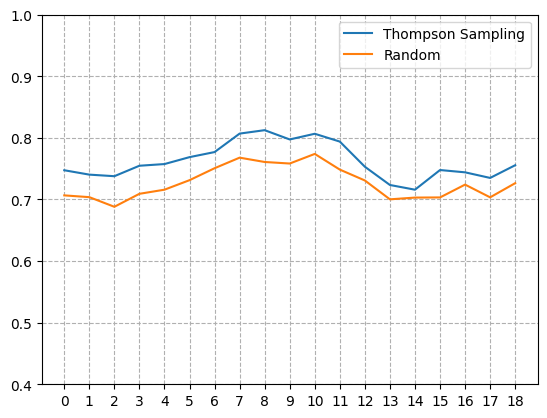

In [176]:
# read results
ts_results = pd.read_csv('test_results/ts_results_2022-10-03.csv')
rand_results = pd.read_csv('test_results/random_results_2022-10-01.csv')

# plot
fig, ax = plt.subplots()
x = np.arange(len(ts_results))

# rating scalted from -1 to 1 preprocessing
ax.plot(x, (ts_results.rating + 1)/2) # sigma = 2
ax.plot(x, (rand_results.Rating + 1)/2)

ax.set_xticks(np.arange(bins))
ax.set_xticklabels(np.arange(bins).astype(str))
ax.set_ylim(0.4, 1)
ax.legend(['Thompson Sampling', 'Random'])
ax.grid(linestyle='--')

plt.show()

0 to 1 scalings, 1 if ratings is 4, 5 and 0 otherwise. Thompson sampling sigma = 0.1.

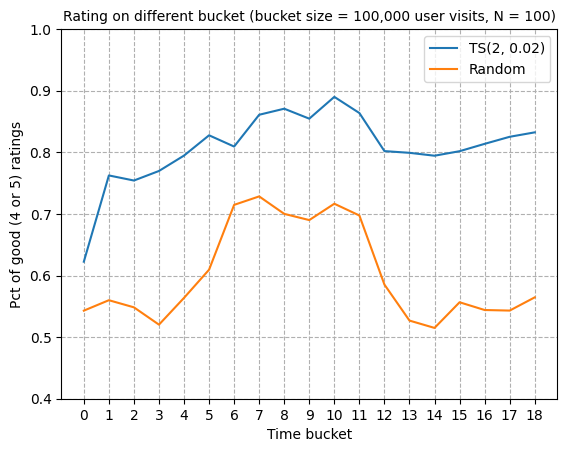

In [184]:
# read results
ts_results = pd.read_csv('test_results/ts_results2_2022-10-03.csv')
rand_results = pd.read_csv('test_results/random_results_2022-10-03.csv')

# plot
fig, ax = plt.subplots()
x = np.arange(len(ts_results))

# 1 if rating = 4, 5 and -1 otherwise preprocessing
ax.plot(x, ts_results.rating) # TS(dim = 2, sigma = 0.02)
ax.plot(x, rand_results.rating)

# plot formatting
ax.set_xticks(np.arange(bins))
ax.set_xticklabels(np.arange(bins).astype(str))
ax.set_title('Rating on different bucket (bucket size = 100,000 user visits, N = 100)', fontsize=10)
ax.set_ylabel('Pct of good (4 or 5) ratings')
ax.set_xlabel('Time bucket')
ax.set_ylim(0.4, 1)
ax.legend(['TS(2, 0.02)', 'Random'])
ax.grid(linestyle='--')

plt.show()

### Thompson Sampling
Prepare data:

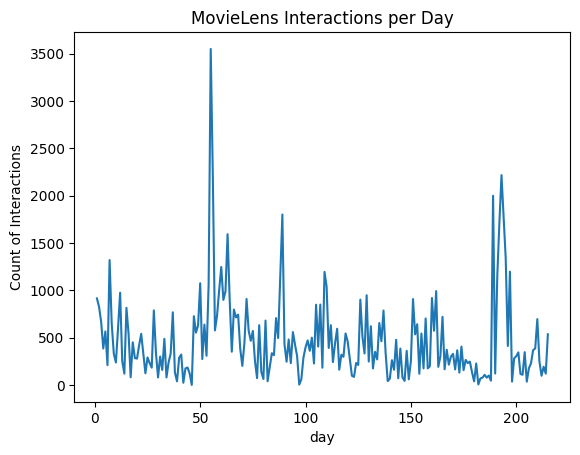

In [333]:
# count interactions grouped by days 
fig, ax = plt.subplots()
udata.groupby('day')['rating'].count().plot(ax=ax)
ax.set_ylabel('Count of Interactions')
ax.set_title('MovieLens Interactions per Day')
plt.show()

In [482]:
# import user-item ratings
udata = pd.read_csv('ml-100k/u.data', delimiter="\t", header=None)
udata.columns = ["user_id", "item_id", "rating", "timestamp"]

# normalize ratings to [-1, 1] scale
scaler = MinMaxScaler(feature_range=(-1, 1))
udata['rating'] = scaler.fit_transform(udata.rating.to_numpy().reshape(-1, 1))

# change timestamp to dates
min_date = datetime(1970, 1, 1)
udata['date'] = udata.timestamp.apply(lambda x: min_date + timedelta(seconds=x))
udata['day'] = udata['date'].apply(lambda x: (x - min_date).days)
udata.day = udata.day - udata.day.min()

# select top N most popular movies
N = 100
top_N_items = udata.item_id.value_counts().sort_values(ascending=False)[:N].index

# filter dataset to include only top N most popular items
udata = udata[udata.item_id.isin(top_N_items)]

# pivot rating data
ratings = udata.pivot(index="user_id", columns="item_id", values="rating")
ratings.index = ratings.index - 1

# replay data
replay = udata[['user_id', 'item_id', 'rating', 'day']].sort_values('day')

# assign time buckets, in general each bucket will have different number of interactions
bins = 19
replay['time_bucket'] = pd.cut(np.arange(len(replay)), bins=bins, labels=np.arange(bins)).astype(int)


ratings.to_csv('datasets/MovieLens_ratings.csv', index=False)
replay[['user_id',  'item_id', 'rating', 'time_bucket']].to_csv('datasets/MovieLens_replay.csv', index=False)

# show header
replay.head()

,user_id,item_id,rating,day,time_bucket
53245,712,79,0.5,0,0
72156,276,12,1.0,0,0
13961,276,288,0.5,0,0
13977,23,98,1.0,0,0
55520,276,25,0.5,0,0


In [481]:
replay = pd.read_csv('datasets/MovieLens_replay.csv')
len(replay)

29931

In [485]:
replay.time_bucket.value_counts()

0     1576
7     1576
15    1576
11    1576
18    1576
3     1576
5     1575
6     1575
4     1575
8     1575
1     1575
10    1575
12    1575
13    1575
14    1575
2     1575
16    1575
17    1575
9     1575
Name: time_bucket, dtype: int64

In [454]:
replay.user_id.min()

1

#### Run experiment:

In [337]:
import time
from ThompsonSampling2 import Thompson_Sampling 

# initialize Thompson Sampling
T = len(train)
TS = Thompson_Sampling(ratings=ratings, T=T)

# run experiment
start_time = time.time()
t_ = 1
T = len(train)
for t in train.day[:T]:
    TS.train(user_idx=train.iloc[t, 0], t=train.iloc[t, 1])
    
    if t > t_:
        print("Progress", t/train.day.nunique())
        t_ += t

# print runtime
try:
    print("The time of execution of the above experiment is:", time.time() - start_time)
except:
    pass

# plot results
results = TS.get_average_ctr()
plt.plot(np.arange(len(results)), results)
plt.show()

2e-05
4e-05
8e-05
0.00016
0.00032
0.00064


KeyboardInterrupt: 

In [461]:
np.random.choice(10)

5

In [406]:
a = [0] * ratings.shape[0]
for i, j in replay[['user_id', 'time_bucket']].to_numpy():
    print(a[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [410]:
replay

,user_id,day,time_bucket
57360,119,0,0
24036,119,0,0
31238,276,0,0
71307,276,0,0
18776,276,0,0
...,...,...,...
45083,189,214,16
70952,189,214,16
2300,189,214,16
39453,653,214,16


In [304]:
from math import isnan


class Thompson_Sampling():

    def __init__(self, ratings, T) -> None:
        # set latent vector dimension
        self.dim = 10
        # training periods
        self.T = T

        # user-item ratings
        self.ratings = ratings
        self.n_users = self.ratings.shape[0]
        self.n_items = self.ratings.shape[1]

        # prior distrubtions on user (p), item (q) and ratings
        self.sigma = 1
        self.sigma_p = 1
        self.sigma_q = 1
        self.lambda_p = sigma/sigma_p
        self.lambda_q = sigma/sigma_q
        self.I = identity(n)

        # latent item priors
        self.A = [lambda_p * I]*self.n_items
        self.b = np.zeros((self.n_users, self.dim))

        # logs
        self.sampled_item_cache = np.zeros((self.n_users, self.dim))
        self.recommended_arm = [0]*self.n_users
        self.rewards_log = [0]*self.T
        
    def select_arm(self, user_idx, t):
        """
        Select arm for user i and time t
        Return: arm
        """
        # get priors from previous period
        A = self.A[user_idx]
        b = self.b[user_idx]

        # estimate posterior mean
        mu = matmul(b, inv(A).T)
        # estimate posterior covariance
        cov = inv(A)*(sigma**2)

        # sample latent user, item vector from posterior
        p = multivariate_normal(mu, cov)
        q = multivariate_normal(v, Psi)

        # select arm
        arm = argmax((p*q).sum())

        # update cache
        self.recommended_arm[user_idx] = arm
        self.sampled_item_cache[user_idx] = q

    def update_prior(self, user_idx, reward):
        """
        Recieve reward and update prior
        """
        # pull cached arm and sample latent item vector for user i
        arm = self.recommended_arm[user_idx]
        q = self.sampled_item_cache[user_idx].reshape(-1, 1) # make column vector

        # update prior
        self.A[user_idx, :] = self.A[user_idx, :] + matmul(q, q.T)
        self.b[user_idx, :] = reward*self.b[user_idx, :]

    def train(self, user_idx, t):
        """
        Trigger recommendation every period. Only count recomendation if 
        the user was actually served the same recommendation. Record precision.
        """
        # select current arm 
        arm = self.select_arm(user_idx, t)
        # observe reward
        reward = self.data[user_idx, arm]
        # check for impression
        if not isnan(reward):
            # update prior
            self.update_prior(user_idx, reward)
            # update average reward log 
            self.rewards_log[t] = self.rewards_log[t] 
            + (1/t)*(reward - self.rewards_log[t])

In [306]:
train = udata[['user_id', 'day']].sort_values('day')
train.head()

,user_id,day
57360,119,0
24036,119,0
31238,276,0
71307,276,0
18776,276,0


In [305]:
# run through training data
train = udata[['user_id', 'day']].sort_values('day').head()

# initialize Thompson Sampling 
T = len(train)
TS = Thompson_Sampling(ratings=ratings, T=T)

# run experiment
for t in train.day:
    TS.train(user_idx=train.iloc[0, 0], t=train.iloc[0, 1])


ValueError: mean must be 1 dimensional

### Testing Sparse Tensor Package

In [23]:
import pandas as pd
import numpy as np
import sparse
from sklearn.preprocessing import LabelEncoder
from Sparsify import Sparsify

In [9]:

n = 1000
ndims = 4
nnz = 1000000
coords = np.random.randint(0, n - 1, size=(ndims, nnz))
data = np.random.random(nnz)

coords.shape

(4, 1000000)

Read top lines from Netflix data:

In [29]:
print('creating the dataframe from data.csv file..')
df = pd.read_csv('data.csv', sep=',', names=['movie', 'user', 'rating', 'date'], nrows=100000)
df.date = pd.to_datetime(df.date)

# add date index


# arranging the rating according to time
print('sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('sorting done.')

# create integer time_index
print('creating time index')
df['time_index'] = pd.cut(df.date, bins=20)
enc = LabelEncoder()
df['time_indx'] = enc.fit_transform(df.time_index.to_numpy())
print('Done.\n')

df.head()

creating the dataframe from data.csv file..
sorting the dataframe by date..
sorting done.
creating time index
Done.



,movie,user,rating,date,time_index,time_indx
32944,18,1056435,4,2000-01-06,"(2000-01-03 19:32:09.600000, 2000-04-24 07:12:00]",0
38985,18,633086,5,2000-01-06,"(2000-01-03 19:32:09.600000, 2000-04-24 07:12:00]",0
22222,16,1356928,3,2000-01-07,"(2000-01-03 19:32:09.600000, 2000-04-24 07:12:00]",0
22608,16,1066384,2,2000-01-07,"(2000-01-03 19:32:09.600000, 2000-04-24 07:12:00]",0
23424,16,1943174,2,2000-01-08,"(2000-01-03 19:32:09.600000, 2000-04-24 07:12:00]",0


In [27]:
enc = LabelEncoder()
enc.fit_transform(df.time_index.to_numpy())

array([ 0,  0,  0, ..., 19, 19, 19])

Make sparse tensor:

In [15]:
user_col = 'user'
item_col = 'movie'
date_col = 'date'
rating_col = 'rating'

rows = df[user_col]
cols = df[item_col]
date_idx = df.date
rating = df[rating_col]
ratings = sparse.COO((rating, (rows, cols, date_idx)))
ratings.eliminate_zeros()

ratings.toarray()

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

Make sparse matrix:

In [18]:
# create a sparse matrix of using the (rating, (rows, cols)) format
from scipy.sparse import csr_matrix

user_col = 'user'
item_col = 'movie'
date_col = 'date'
rating_col = 'rating'

rows = df[user_col]
cols = df[item_col]
date_idx = df.date
rating = df[rating_col]
ratings = csr_matrix((rating, (rows, cols, date_idx)))
ratings.eliminate_zeros()

print(ratings.toarray().shape)
print(df.pivot(index=user_col, columns=item_col, values=rating_col).shape)
print(df.shape)
print("Unique Items:", df.movie.nunique())
print("Unique Users:", df.user.nunique())

TypeError: invalid input format

In [17]:
ratings.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 0, 0]])

In [12]:
df.pivot(index=user_col, columns=item_col, values=rating_col).head()

movie,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
user,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [9]:
df = Sparsify().create_matrix(data=df, user_col='user', item_col='movie', rating_col='rating')

AttributeError: Can only use .cat accessor with a 'category' dtype

In [2]:
1+1

2